In [383]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm
from itertools import product
from matplotlib.colors import LinearSegmentedColormap
from imageio import imwrite
from numba import jit

In [472]:
idx = np.concatenate([np.array([0]),np.random.choice(8,size=8,replace=False),np.array([7])])

In [477]:
colors = np.array([[25, 24, 23],
                  [120, 90, 70],
                  [130, 24, 23],
                  [250, 179, 100],
                  [43, 65, 98],
                  [11, 110, 79],
                  [150, 110, 79],
                  [255, 255, 255]])/255 #[idx]/255

In [478]:
colors.shape

(8, 3)

In [406]:
# zn = zn-1^2 + C
@jit(nopython=True)
def compute_next(z, C):
    zn = np.array([z[0]**2 - z[1]**2, 2.0*z[0]*z[1]])
    return zn + C
@jit(nopython=True)
def compute_iterations(z0, C, max_iterations):
    zn = z0
    iterations = 0
    while (zn.dot(zn) < 4.0) and (iterations < max_iterations):
        zn = compute_next(zn, C)
        iterations += 1
    return iterations
@jit(nopython=True)
def render(render_shape, C, max_iterations):
    
    grid = np.zeros(render_shape)
    
    scale = 1/(render_shape[1]/2)
    
    samples = 8
    
    for x in range(render_shape[0]):
        for y in range(render_shape[1]):
            #tqdm(product(range(render_shape[0]),range(render_shape[1]))):

            for j in range(samples):

                px = scale*(np.random.randn() +  x - render_shape[0]/2)
                py = scale*(np.random.randn() +  y - render_shape[1]/2)

                z0 = np.array([px,py])
                iterations = compute_iterations(z0, C, max_iterations)
                grid[x,y] += iterations

            grid[x,y] /= samples
        
    return grid

In [481]:
idx = 1
max_iter = 500
C = np.array([-0.780045,-0.13012])

im_shape = (16000,8000)

In [482]:
counts_image = render(im_shape, C, max_iter)

In [483]:
custom_cmap = LinearSegmentedColormap.from_list('goop', colors, N=max_iter)

fractal_image = custom_cmap(counts_image/counts_image.max())

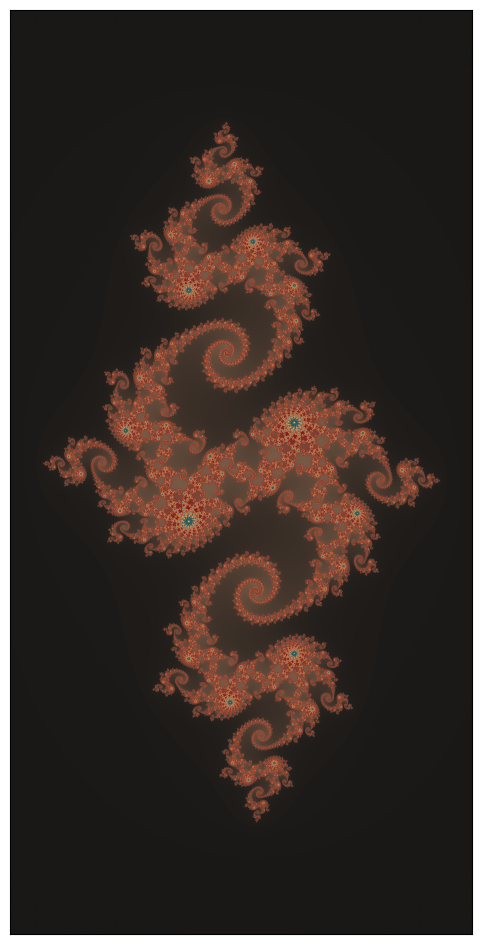

In [484]:
fig, ax = plt.subplots(1, figsize=[12,12])

ax.imshow(fractal_image)

ax.set_xticks([])
ax.set_yticks([])
ax.set_xticklabels([])
ax.set_yticklabels([])

#plt.savefig(f'fractal{idx}.png',dpi=300)

plt.show()

In [461]:
imwrite(f'fractal_large_{6}.png', fractal_image)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


In [411]:
imwrite(f'fractal_large_{idx}.png', fractal_image)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
